In [178]:
!pip install opencv-python


In [179]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
# from skimage.color import rgb2gray

In [180]:
messi = 'static\images\messi.jpg'
flowers = 'static\images\magnitude image.jpg'

[[103 108 112 ...  40  42  43]
 [107 109 109 ...  40  42  42]
 [109 106 105 ...  41  42  42]
 ...
 [ 96  95  97 ...  58  59  59]
 [ 96  96  98 ...  55  56  57]
 [ 96  97  98 ...  56  56  58]]


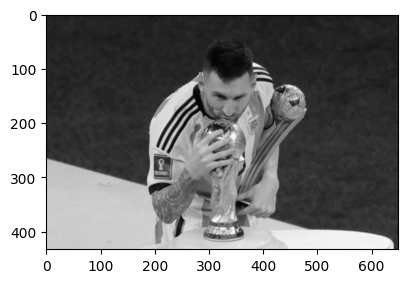

In [181]:
messi = cv2.imread(messi, 0)
flower = cv2.imread(flowers, 0)
print(flower)
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(messi, cmap='gray')






In [182]:
def get_size_of_images(img):
  
    # get width and height
    if img is None:
        return -1,-1
    else:

        width = img.shape[1]
        height = img.shape[0]
        print ("the width is" , width)
        print ("the height is" , height)
        return width , height


In [183]:
def dimension_to_transform(img_1,img_2):
    width1 , height1  = get_size_of_images(img_1)
    width2 , height2  = get_size_of_images(img_2)
    if(width1 ==-1 or height1 ==-1):
        return width2 ,height2
    elif (width2 ==-1 or height2 ==-1):
        return width1 ,height1
    else:
        if (width1 > width2):
            width = width2
        else:
            width = width1
        
        if (height1 > height2):
            height = height2
        else:
            height = height1

        return width , height

In [184]:
dimension_to_transform(messi,flower)

the width is 650
the height is 433
the width is 5631
the height is 3518


(650, 433)

In [185]:
def Resizing_image(img_1 , img_2):
    width , height = dimension_to_transform(img_1,img_2)
    print(width)
    print(height)
    if  img_2 is not None:
        img_1=cv2.resize(img_1 , (width,height))
        img_2=cv2.resize(img_2 , (width,height))
        return img_1 , img_2


    

In [186]:
messi_resized , flower_resized =Resizing_image(messi,flower)

the width is 650
the height is 433
the width is 5631
the height is 3518
650
433


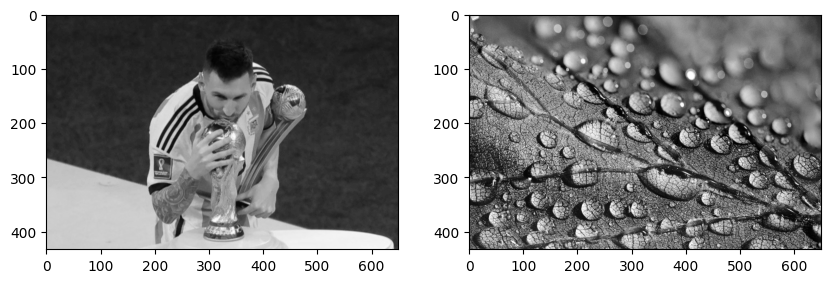

In [187]:
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(messi_resized, cmap='gray')
plt.subplot(122)
plt.imshow(flower_resized, cmap='gray')
plt.show()

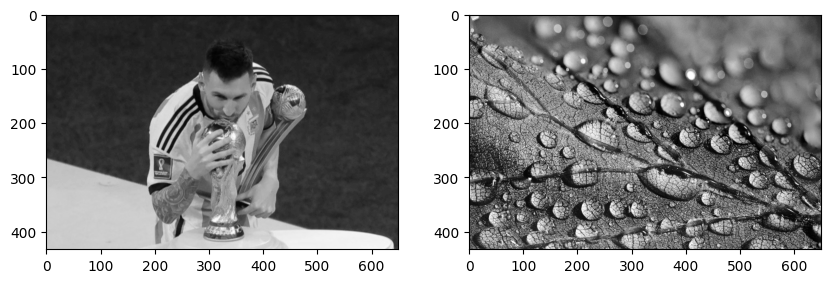

In [188]:

plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(messi_resized, cmap='gray')
plt.subplot(122)
plt.imshow(flower_resized, cmap='gray')
plt.show()

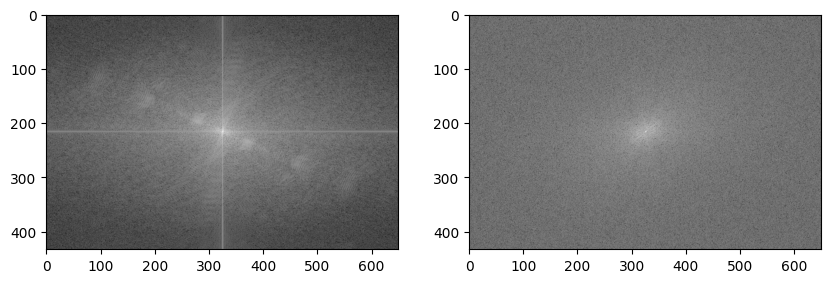

In [189]:
messi_fft = np.fft.fftshift(np.fft.fft2(messi_resized))
flower_fft = np.fft.fftshift(np.fft.fft2(flower_resized))

plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(np.log(np.abs(messi_fft)), cmap='gray')
plt.subplot(122)
plt.imshow(np.log(np.abs(flower_fft)), cmap='gray')
plt.show()

In [190]:
messi_amplitude = np.sqrt(np.real(messi_fft) ** 2 + np.imag(messi_fft) ** 2)
messi_phase = np.arctan2(np.imag(messi_fft), np.real(messi_fft))
flower_amplitude = np.sqrt(np.real(flower_fft) ** 2 + np.imag(flower_fft) ** 2)
flower_phase = np.arctan2(np.imag(flower_fft), np.real(flower_fft))

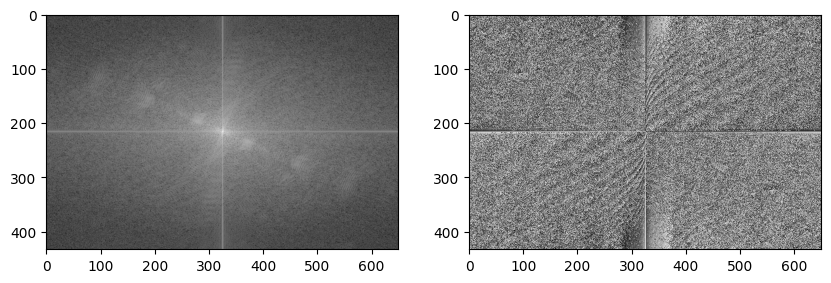

In [191]:
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(np.log(messi_amplitude+1e-10), cmap='gray')
plt.subplot(122)
plt.imshow(messi_phase, cmap='gray')

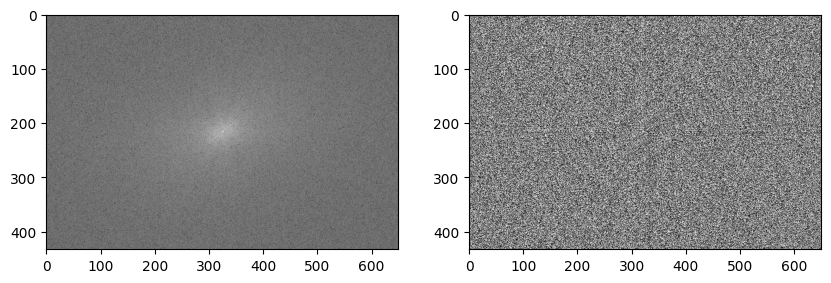

In [192]:
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(np.log(flower_amplitude+1e-10), cmap='gray')
plt.subplot(122)
plt.imshow(flower_phase, cmap='gray')

[[233.14662918 112.92085948 288.79121873 ... 175.02731939 222.30000027
   39.5992063 ]
 [218.12865602 171.66700588 198.22264782 ... 212.89351723  67.99755746
  390.83432352]
 [252.72842087 355.4016491  113.88891288 ... 133.12137679 189.61911907
  336.39338109]
 ...
 [252.72842087 336.39338109 189.61911907 ... 252.23731221 113.88891288
  355.4016491 ]
 [218.12865602 390.83432352  67.99755746 ... 174.64069182 198.22264782
  171.66700588]
 [233.14662918  39.5992063  222.30000027 ... 367.69365567 288.79121873
  112.92085948]]
[[17887.48906688  3204.49584416  4671.92350312 ...  5288.38248951
  11194.61616716 15261.57937191]
 [ 5012.07695301  2451.26497096  4039.60496133 ... 14349.23439942
   4158.97549629  8689.88228648]
 [12612.02301237 13730.96072153 11055.25019655 ... 11171.929462
   9371.75731458  3570.97086082]
 ...
 [12612.02301237  3570.97086082  9371.75731458 ...  7063.31022912
  11055.25019655 13730.96072153]
 [ 5012.07695301  8689.88228648  4158.97549629 ... 19876.9634889
   4039.

C:\Users\Ahmed Ashraf\AppData\Local\Temp\ipykernel_25580\1601677856.py:21: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(messi_phase), cmap='gray')
C:\Users\Ahmed Ashraf\AppData\Local\Temp\ipykernel_25580\1601677856.py:21: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(messi_phase), cmap='gray')


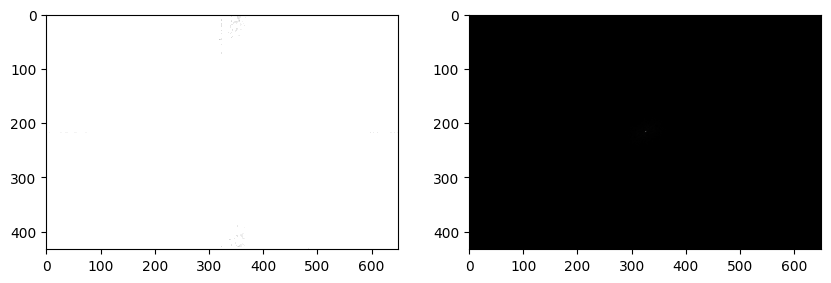

In [193]:
for x in range (0, messi_amplitude.shape[0]):
    for y in range ( 0,messi_amplitude.shape[1]):
        if (x>=150 and x<=250) and(y >=200 and y <=420):
                messi_amplitude[x][y] =    1
        



for x in range (0, messi_phase.shape[0]):
    for y in range ( 0,messi_phase.shape[1]):
        if (x>=150 and x<=250) and(y >=200 and y <=420):
                messi_phase[x][y] =   0
        
      
        

print(messi_amplitude)
print(flower_amplitude)
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(np.log(messi_phase), cmap='gray')
plt.subplot(122)
plt.imshow(flower_amplitude, cmap='gray')


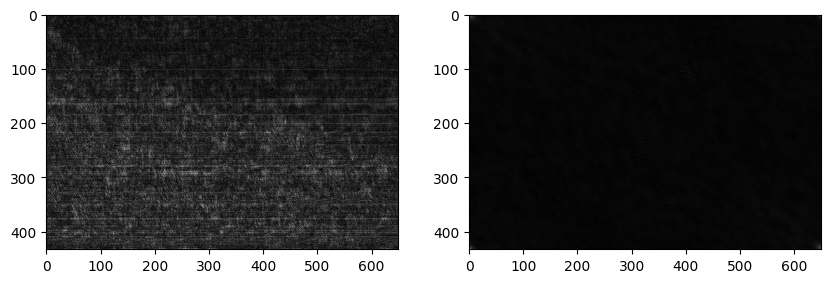

In [194]:
# amplitude_phase
messi_flower_comb = np.multiply(messi_amplitude, np.exp(1j * flower_phase))
messi_flower = np.abs(np.fft.ifft2(np.fft.ifftshift(messi_flower_comb)))  # drop imagniary as they are around 1e-14

flower_messi_comb = np.multiply(flower_amplitude, np.exp(1j * messi_phase))
flower_messi = np.abs(np.fft.ifft2(np.fft.ifftshift(flower_messi_comb )))  # drop imagniary as they are around 1e-14

# combined image has values < 0 and > 1, needs to be scaled.
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(np.abs(messi_flower), cmap='gray')
plt.subplot(122)
plt.imshow(np.abs(flower_messi), cmap='gray')



In [195]:
print (messi_amplitude)
print(messi_amplitude.shape)
x, y = messi_amplitude.shape
print(x)
print(y)


[[233.14662918 112.92085948 288.79121873 ... 175.02731939 222.30000027
   39.5992063 ]
 [218.12865602 171.66700588 198.22264782 ... 212.89351723  67.99755746
  390.83432352]
 [252.72842087 355.4016491  113.88891288 ... 133.12137679 189.61911907
  336.39338109]
 ...
 [252.72842087 336.39338109 189.61911907 ... 252.23731221 113.88891288
  355.4016491 ]
 [218.12865602 390.83432352  67.99755746 ... 174.64069182 198.22264782
  171.66700588]
 [233.14662918  39.5992063  222.30000027 ... 367.69365567 288.79121873
  112.92085948]]
(433, 650)
433
650


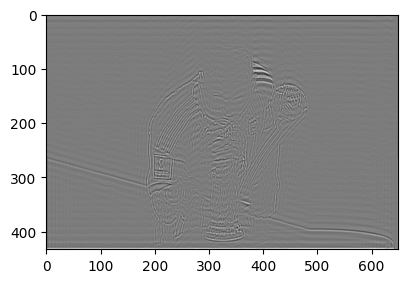

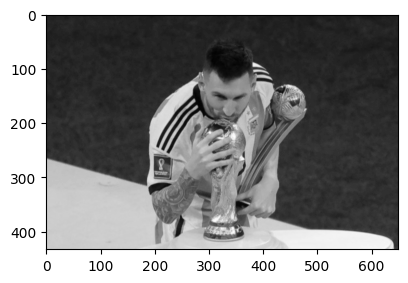

In [196]:
messi_flower_comb = np.multiply(messi_amplitude, np.exp(1j * messi_phase))
messi_flower = np.real(np.fft.ifft2(np.fft.ifftshift(messi_flower_comb)))  # drop imagniary as they are around 1e-14



# combined image has values < 0 and > 1, needs to be scaled.
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(messi_flower, cmap='gray')


plt.figure(figsize=(10, 15))
plt.subplot(122)
plt.imshow(messi, cmap='gray')


In [197]:

for x in range (0, messi_phase.shape[0]):
    for y in range ( 0,messi_phase.shape[1]):
                flower_amplitude[x][y] =   1


for x in range (0, messi_phase.shape[0]):
    for y in range ( 0,messi_phase.shape[1]):
                flower_phase[x][y] = 0


C:\Users\Ahmed Ashraf\AppData\Local\Temp\ipykernel_25580\1266380398.py:5: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(flower_phase)), cmap='gray')


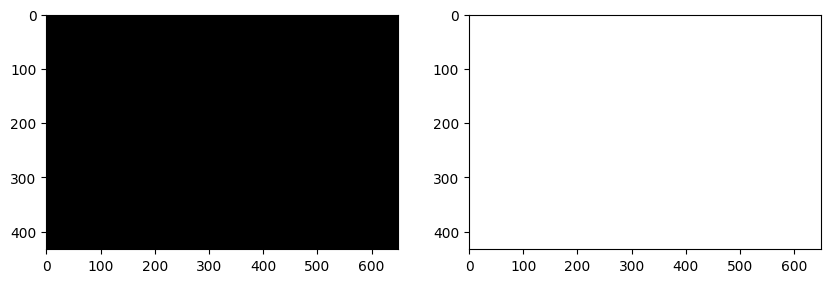

In [198]:


plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(np.log(np.abs(flower_amplitude)), cmap='gray')
plt.subplot(122)
plt.imshow(np.log(np.abs(flower_phase)), cmap='gray')
plt.show()

In [199]:
print(flower_amplitude)
print('--------------------------------------')
print(flower_phase)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
--------------------------------------
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


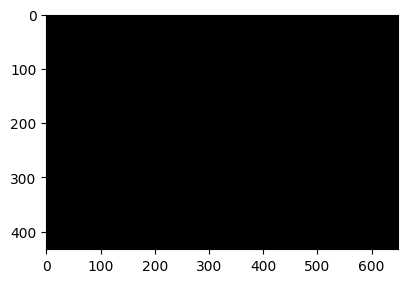

In [200]:
uniform_image = np.multiply(flower_amplitude, np.exp(1j * flower_phase))
uniform_image = np.abs(np.fft.ifft2(np.fft.ifftshift(uniform_image )))

plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(uniform_image ,cmap='gray')



True

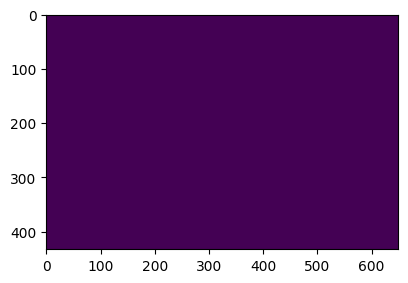

In [201]:
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(uniform_image)

cv2.imwrite('image_rgb.png', uniform_image)

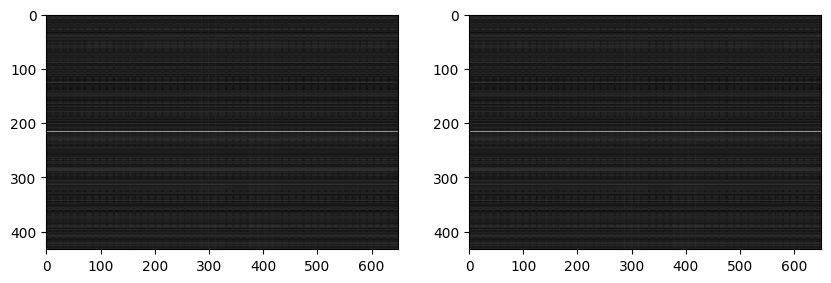

In [202]:
uniform_fft = np.fft.fftshift(np.fft.fft2(uniform_image))

plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(np.log(np.abs(uniform_fft)), cmap='gray')
plt.subplot(122)
plt.imshow(np.log(np.abs(uniform_fft)), cmap='gray')
plt.show()

C:\Users\Ahmed Ashraf\AppData\Local\Temp\ipykernel_25580\3612156332.py:8: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(uniform_phase)), cmap='gray')


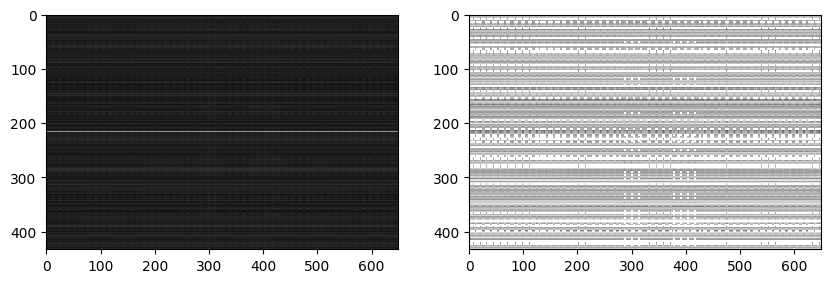

In [203]:
uniform_amplitude = np.sqrt(np.real(uniform_fft) ** 2 + np.imag(uniform_fft) ** 2)
uniform_phase = np.arctan2(np.imag(uniform_fft), np.real(uniform_fft))

plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(np.log(np.abs(uniform_amplitude)), cmap='gray')
plt.subplot(122)
plt.imshow(np.log(np.abs(uniform_phase)), cmap='gray')
plt.show()


In [204]:
print(uniform_amplitude)
print('--------------------------------------------------------')
print(uniform_phase)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
--------------------------------------------------------
[[-2.77555756e-16 -2.77555756e-16 -2.77555756e-16 ... -2.77555756e-16
  -2.77555756e-16 -2.77555756e-16]
 [ 1.66533454e-16  1.66533454e-16  2.22044605e-16 ...  1.66533454e-16
   1.66533454e-16  1.66533454e-16]
 [-2.77555756e-16 -2.77555756e-16 -1.66533454e-16 ... -2.77555756e-16
  -2.77555756e-16 -2.77555756e-16]
 ...
 [-1.11022302e-16 -1.11022302e-16  1.66533454e-16 ... -1.11022302e-16
  -1.11022302e-16 -1.11022302e-16]
 [-3.88578059e-16 -3.88578059e-16 -3.33066907e-16 ... -3.88578059e-16
  -3.88578059e-16 -3.88578059e-16]
 [-4.44089210e-16 -4.44089210e-16 -3.88578059e-16 ... -4.44089210e-16
  -4.44089210e-16 -4.44089210e-16]]
